In [1]:
from maxentnuc.analysis.domain_analyzer import DomainAnalyzer, get_boundary_loops, Domains
from maxentnuc.analysis.mei_analyzer import MEIAnalyzer
from maxentnuc.analysis.analysis import *
from maxentnuc.analysis.insulation import *

from matplotlib.colors import LogNorm
import os
from cooltools.api.insulation import _insul_diamond_dense
from neighbor_balance.plotting import parse_region, format_ticks, ContactMap, apply_matplotlib_style, get_epigenetics, stylize_gene_name

omics = '/home/joepaggi/orcd/pool/omics'
mei_runs = '/orcd/data/binz/001/joepaggi/mei_runs'

apply_matplotlib_style()

In [2]:
main_names = ['nanog', 'sox2', 'fbn2', 'klf1', 'ppm1g']

stylized_names = {name: stylize_gene_name(name) for name in main_names}
stylized_names['ppm1g_rad21_aid'] = stylize_gene_name('ppm1g') + ' ' + stylize_gene_name('rad21') + ' AID'
stylized_names['ppm1g_ice'] = stylize_gene_name('ppm1g') + ' ICE'
stylized_names['packing domains'] = 'Packing domains'

prod = {
    'nanog': {'config': f'{mei_runs}/nanog/v36/config.yaml', 'iteration': 18},
    'klf1': {'config': f'{mei_runs}/klf1/v3/config.yaml', 'iteration': 11},
    'ppm1g': {'config': f'{mei_runs}/ppm1g/v2/config.yaml', 'iteration': 10},
    'ppm1g_ice': {'config': f'{mei_runs}/ppm1g/v3/config.yaml', 'iteration': 12},
    'ppm1g_rad21_aid': {'config': f'{mei_runs}/ppm1g/v4/config.yaml', 'iteration': 24},
    'sox2': {'config': f'{mei_runs}/sox2/v11/config.yaml', 'iteration': 13},
    'fbn2' : {'config': f'{mei_runs}/fbn2/v2/config.yaml', 'iteration': 12},
}

for name in prod:
    prod[name]['mei'] = MEIAnalyzer(prod[name]['config'], scale=0.1)

In [3]:
analyzer = DomainAnalyzer(30, 200, min_loop_size=2, add_boundary_linkers=True)
analyzer.min_samples, to_micromolar(analyzer.min_samples, 4/3*np.pi*30**3)

(14, 205.5582496850931)

In [4]:
domains = {}
for name, info in prod.items():
    trajectory = info['mei'].get_positions(info['iteration'], skip=110, burnin=0)
    trajectory = trajectory.reshape(-1, *trajectory.shape[-2:])
    domains[name] = analyzer.analyze_trajectory(trajectory)

/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
INFO:MDAnalysis.core.universe:The attribute(s) masses, types have already been read from the topology file. The guesser will only guess empty values for this attribute, if any exists. To overwrite it by completely guessed values, you can pass the attribute to the force_guess parameter instead of the to_guess one
INFO:MDAnalysis.guesser.base:There is no empty types values. Guesser did not guess any new values for types attribute
INFO:MDAnalysis.guesser.base:There is no empty masses values. Guesser did not

/orcd/data/binz/001/joepaggi/mei_runs/nanog/v36/018_trajectory.*.dcd


INFO:MDAnalysis.core.universe:The attribute(s) masses, types have already been read from the topology file. The guesser will only guess empty values for this attribute, if any exists. To overwrite it by completely guessed values, you can pass the attribute to the force_guess parameter instead of the to_guess one
INFO:MDAnalysis.guesser.base:There is no empty types values. Guesser did not guess any new values for types attribute
INFO:MDAnalysis.guesser.base:There is no empty masses values. Guesser did not guess any new values for masses attribute
INFO:MDAnalysis.core.universe:The attribute(s) masses, types have already been read from the topology file. The guesser will only guess empty values for this attribute, if any exists. To overwrite it by completely guessed values, you can pass the attribute to the force_guess parameter instead of the to_guess one
INFO:MDAnalysis.guesser.base:There is no empty types values. Guesser did not guess any new values for types attribute
INFO:MDAnalysis.

/orcd/data/binz/001/joepaggi/mei_runs/klf1/v3/011_trajectory.*.dcd


/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
INFO:MDAnalysis.core.universe:The attribute(s) masses, types have already been read from the topology file. The guesser will only guess empty values for this attribute, if any exists. To overwrite it by completely guessed values, you can pass the attribute to the force_guess parameter instead of the to_guess one
INFO:MDAnalysis.guesser.base:There is no empty types values. Guesser did not guess any new values for types attribute
INFO:MDAnalysis.guesser.base:There is no empty masses values. Guesser did not

/orcd/data/binz/001/joepaggi/mei_runs/ppm1g/v2/010_trajectory.*.dcd


/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
INFO:MDAnalysis.core.universe:The attribute(s) masses, types have already been read from the topology file. The guesser will only guess empty values for this attribute, if any exists. To overwrite it by completely guessed values, you can pass the attribute to the force_guess parameter instead of the to_guess one
INFO:MDAnalysis.guesser.base:There is no empty types values. Guesser did not guess any new values for types attribute
INFO:MDAnalysis.guesser.base:There is no empty masses values. Guesser did not

/orcd/data/binz/001/joepaggi/mei_runs/ppm1g/v3/012_trajectory.*.dcd


/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
INFO:MDAnalysis.core.universe:The attribute(s) masses, types have already been read from the topology file. The guesser will only guess empty values for this attribute, if any exists. To overwrite it by completely guessed values, you can pass the attribute to the force_guess parameter instead of the to_guess one
INFO:MDAnalysis.guesser.base:There is no empty types values. Guesser did not guess any new values for types attribute
INFO:MDAnalysis.guesser.base:There is no empty masses values. Guesser did not

/orcd/data/binz/001/joepaggi/mei_runs/ppm1g/v4/024_trajectory.*.dcd


/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
INFO:MDAnalysis.core.universe:The attribute(s) masses, types have already been read from the topology file. The guesser will only guess empty values for this attribute, if any exists. To overwrite it by completely guessed values, you can pass the attribute to the force_guess parameter instead of the to_guess one
INFO:MDAnalysis.guesser.base:There is no empty types values. Guesser did not guess any new values for types attribute
INFO:MDAnalysis.guesser.base:There is no empty masses values. Guesser did not

/orcd/data/binz/001/joepaggi/mei_runs/sox2/v11/013_trajectory.*.dcd


/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
INFO:MDAnalysis.core.universe:The attribute(s) masses, types have already been read from the topology file. The guesser will only guess empty values for this attribute, if any exists. To overwrite it by completely guessed values, you can pass the attribute to the force_guess parameter instead of the to_guess one
INFO:MDAnalysis.guesser.base:There is no empty types values. Guesser did not guess any new values for types attribute
INFO:MDAnalysis.guesser.base:There is no empty masses values. Guesser did not

/orcd/data/binz/001/joepaggi/mei_runs/fbn2/v2/012_trajectory.*.dcd


/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
INFO:MDAnalysis.core.universe:The attribute(s) masses, types have already been read from the topology file. The guesser will only guess empty values for this attribute, if any exists. To overwrite it by completely guessed values, you can pass the attribute to the force_guess parameter instead of the to_guess one
INFO:MDAnalysis.guesser.base:There is no empty types values. Guesser did not guess any new values for types attribute
INFO:MDAnalysis.guesser.base:There is no empty masses values. Guesser did not

In [5]:
surface = {}
for name in prod:
    print(name)
    trajectory = np.vstack([d.positions[None, :] for d in domains[name]])
    surface[name] = np.mean(distances_from_surface(trajectory, radii=5.5*np.ones(trajectory.shape[1]),
                                                   probe_radius=20.0, max_neighbors=2, n_points_per_particle=30) < 5.51, axis=0)

nanog
klf1
ppm1g


ppm1g_ice
ppm1g_rad21_aid
sox2
fbn2


In [6]:
linker = {}
for name in prod:
    trajectory = np.vstack([d.labels[None, :] for d in domains[name]])
    linker[name] = np.mean(trajectory == -1, axis=0)

buf = 50_000 // 200
{k: float(v[buf:-buf].mean()) for k, v in linker.items()}

{'nanog': 0.1673515625,
 'klf1': 0.13525885935769658,
 'ppm1g': 0.04930721393034826,
 'ppm1g_ice': 0.05151741293532338,
 'ppm1g_rad21_aid': 0.14997885572139302,
 'sox2': 0.04980775316455697,
 'fbn2': 0.06335742630385488}

In [7]:
import numpy as np
from scipy.spatial import KDTree
from scipy.sparse import coo_matrix

def contact_indicator(distances, threshold=100):
    return distances < threshold

def get_contact_map(trajectory, contact_indicator, cutoff=100):
    N = trajectory.shape[1]
    all_contacts = coo_matrix((N, N), dtype=np.float32)
    for positions in trajectory:
        tree = KDTree(positions)
        contacts = tree.sparse_distance_matrix(tree, max_distance=cutoff, output_type='coo_matrix')
        contacts.data = contact_indicator(contacts.data)
        all_contacts += contacts

    all_contacts.data /= len(trajectory)
    return np.asarray(all_contacts.todense())

r = 40
density = {}
for name in prod:
    trajectory = np.vstack([d.positions[None, :] for d in domains[name]])
    print(name, trajectory.shape)
    contacts = get_contact_map(trajectory, lambda d: contact_indicator(d, threshold=r), cutoff=r)
    density[name] = to_micromolar(np.sum(contacts, axis=-1), 4/3*np.pi*r**3)

nanog (160, 2100, 3)
klf1 (160, 5015, 3)
ppm1g (160, 5525, 3)
ppm1g_ice (160, 5525, 3)
ppm1g_rad21_aid (160, 5525, 3)
sox2 (160, 8400, 3)
fbn2 (160, 4910, 3)


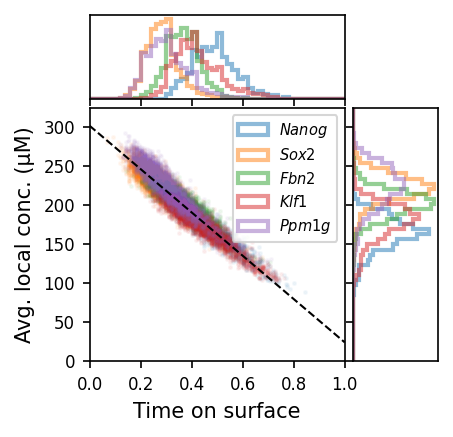

In [8]:
f, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(3, 3),
                     gridspec_kw={'height_ratios': [1, 3], 'width_ratios': [3, 1], 'wspace':0.05, 'hspace':0.05})

buffer = 50_000 // 200
for name in main_names:
    _surface = surface[name][buffer:-buffer]
    _density = density[name][buffer:-buffer]

    ax[1, 0].scatter(_surface, _density, alpha=0.05, s=2, label=stylized_names[name], rasterized=True)
    ax[0, 0].hist(_surface, bins=np.linspace(0, 1, 51), label=stylized_names[name], alpha=0.5, histtype='step', density=True, lw=2)
    ax[1, 1].hist(_density, bins=np.linspace(0, 325, 51), label=stylized_names[name], alpha=0.5, histtype='step', orientation='horizontal', density=True, lw=2)

all_surface = np.concatenate([surface[name][buffer:-buffer] for name in main_names])
all_density = np.concatenate([density[name][buffer:-buffer] for name in main_names])
lr = np.polyfit(all_surface, all_density, 1)
x = np.linspace(0, 1, 100)
ax[1, 0].plot(x, lr[0] * x + lr[1], color='black', lw=1, ls='--', label='Linear fit')

handles, labels = ax[0, 0].get_legend_handles_labels()
ax[1, 0].legend(handles=handles, labels=labels, fontsize=7)
ax[0, 1].axis('off')
ax[1, 0].set_ylabel('Avg. local conc. (µM)')
ax[1, 0].set_xlabel('Time on surface')
ax[1, 0].set_xlim(0, 1)
ax[1, 0].set_ylim(0, 325)
ax[0, 0].set_yticks([])
ax[1, 1].set_xticks([])
plt.savefig('img/density_surface.pdf')
plt.show()

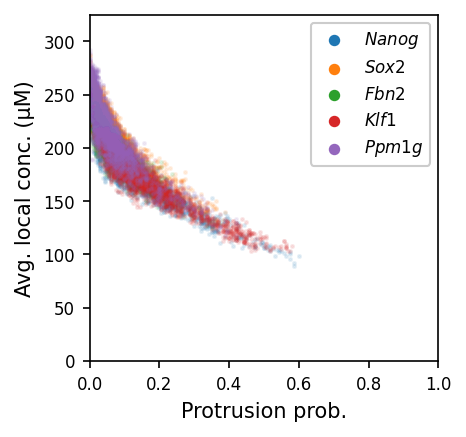

In [9]:
f, ax = plt.subplots(figsize=(3, 3))

buffer = 50_000 // 200
for name in main_names:
    _linker = linker[name][buffer:-buffer]
    _density = density[name][buffer:-buffer]
    sc = ax.scatter(_linker, _density, alpha=0.1, s=2, rasterized=True)
    ax.scatter([], [], color=sc.get_facecolor()[0], s=20, label=stylized_names[name], alpha=1)

ax.legend(framealpha=1)
ax.set_ylabel('Avg. local conc. (µM)')
ax.set_xlabel('Protrusion prob.')
ax.set_xlim(0, 1)
ax.set_ylim(0, 325)
plt.savefig('img/density_linker.pdf')
plt.show()

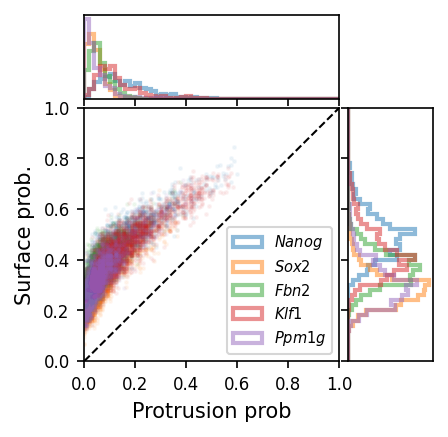

In [10]:
f, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(3, 3),
                     gridspec_kw={'height_ratios': [1, 3], 'width_ratios': [3, 1], 'wspace':0.05, 'hspace':0.05})

buffer = 50_000 // 200
for name in main_names:
    _linker = linker[name][buffer:-buffer]
    _surface = surface[name][buffer:-buffer]

    ax[1, 0].scatter(_linker, _surface, alpha=0.05, s=2, label=stylized_names[name], rasterized=True)
    ax[0, 0].hist(_linker, bins=np.linspace(0, 1, 51), label=stylized_names[name], alpha=0.5, histtype='step', density=True, lw=2)
    ax[1, 1].hist(_surface, bins=np.linspace(0, 1, 51), label=stylized_names[name], alpha=0.5, histtype='step', orientation='horizontal', density=True, lw=2)

handles, labels = ax[0, 0].get_legend_handles_labels()
ax[1, 0].legend(handles=handles, labels=labels, fontsize=7)
ax[0, 1].axis('off')
ax[1, 0].set_ylabel('Surface prob.')
ax[1, 0].set_xlabel('Protrusion prob')
ax[1, 0].set_xlim(0, 1)
ax[1, 0].set_ylim(0, 1)
ax[0, 0].set_yticks([])
ax[1, 1].set_xticks([])
ax[1, 0].plot([0, 1], [0, 1], color='black', lw=1, ls='--')
plt.show()

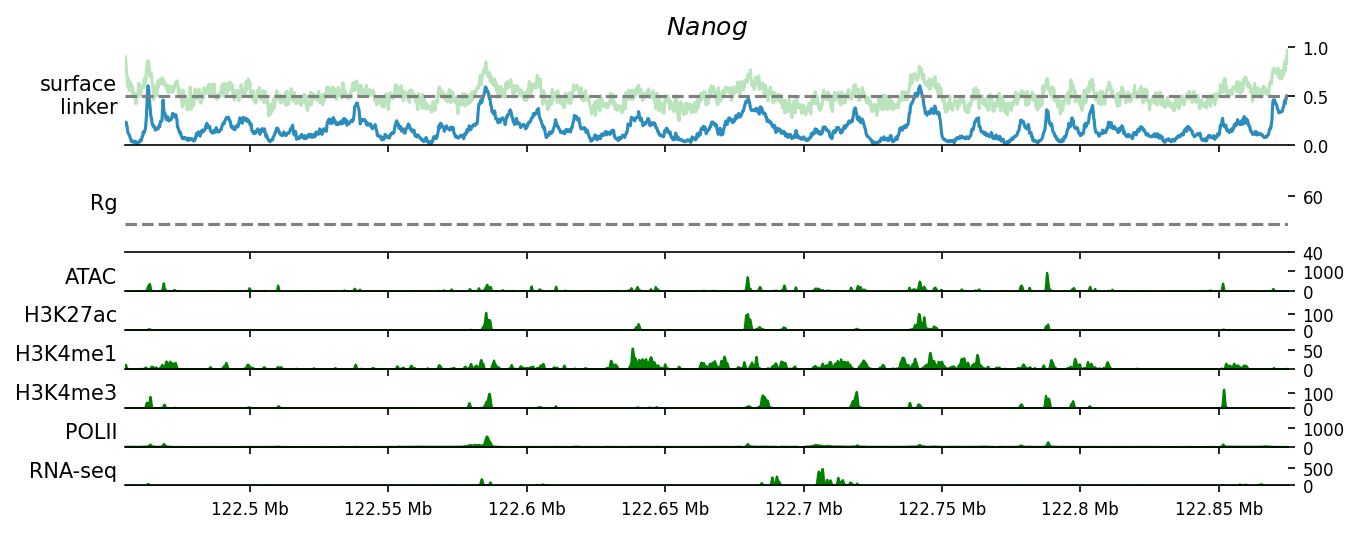

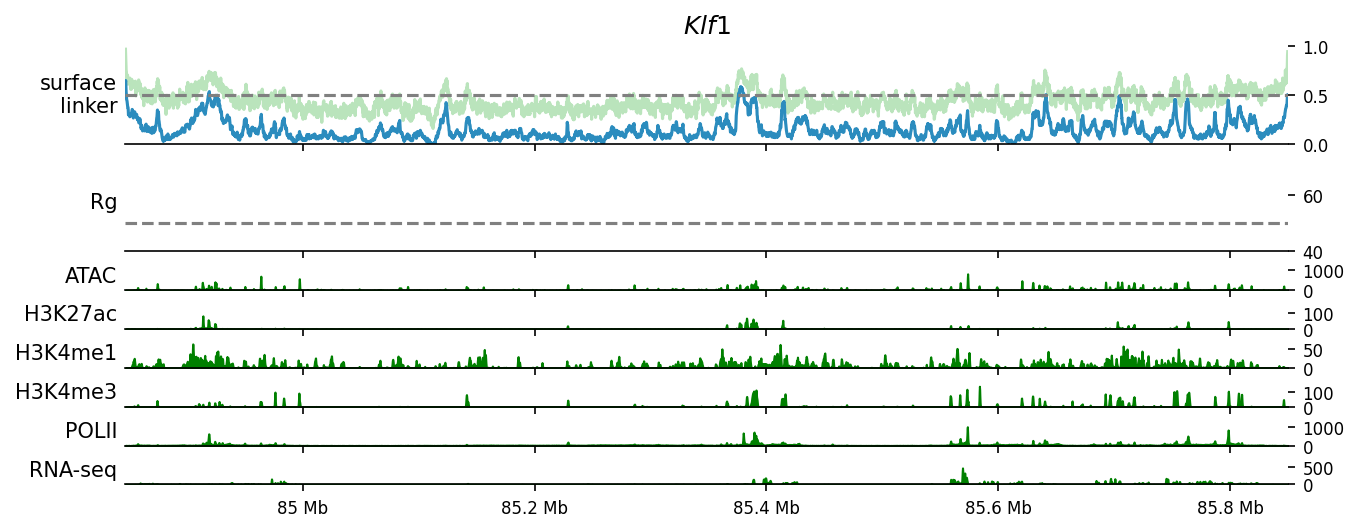

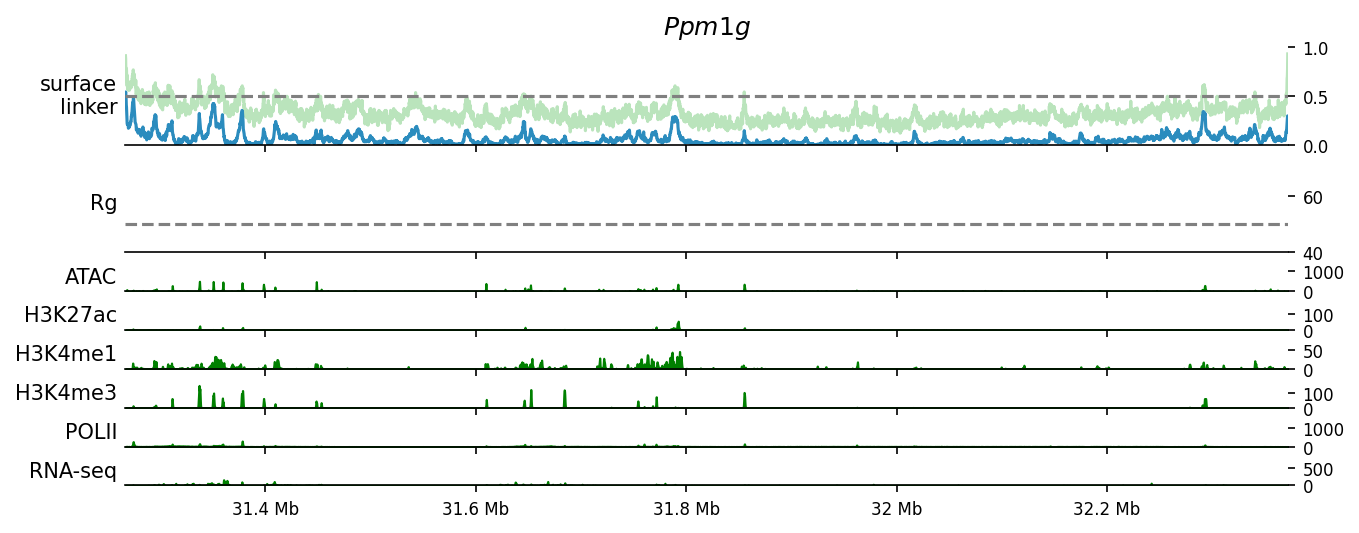

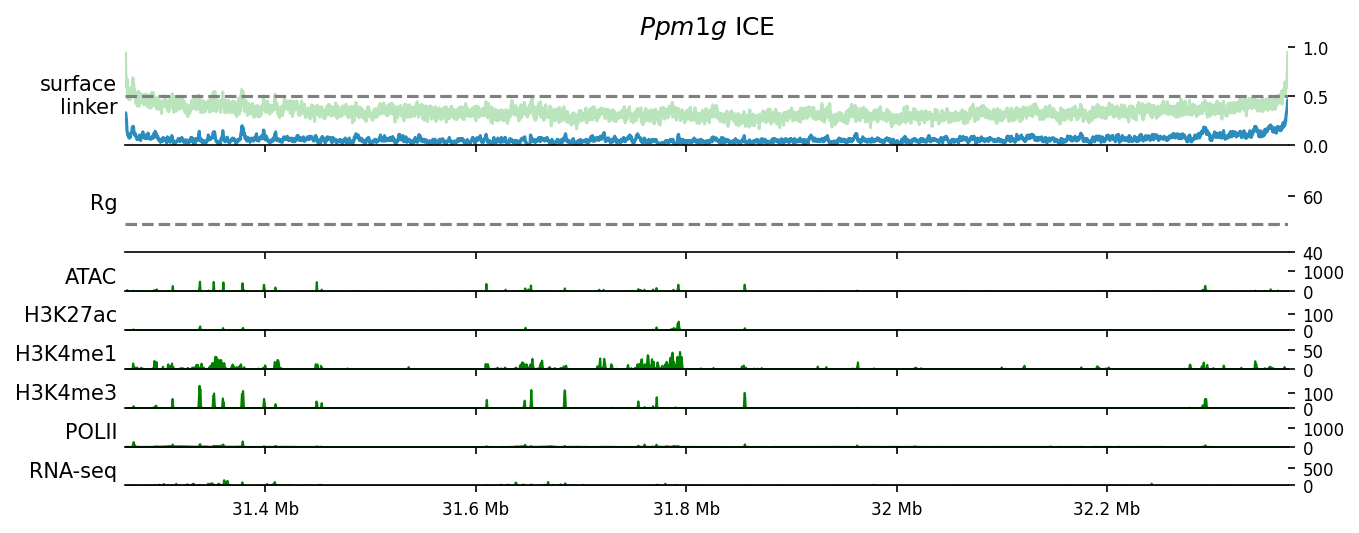

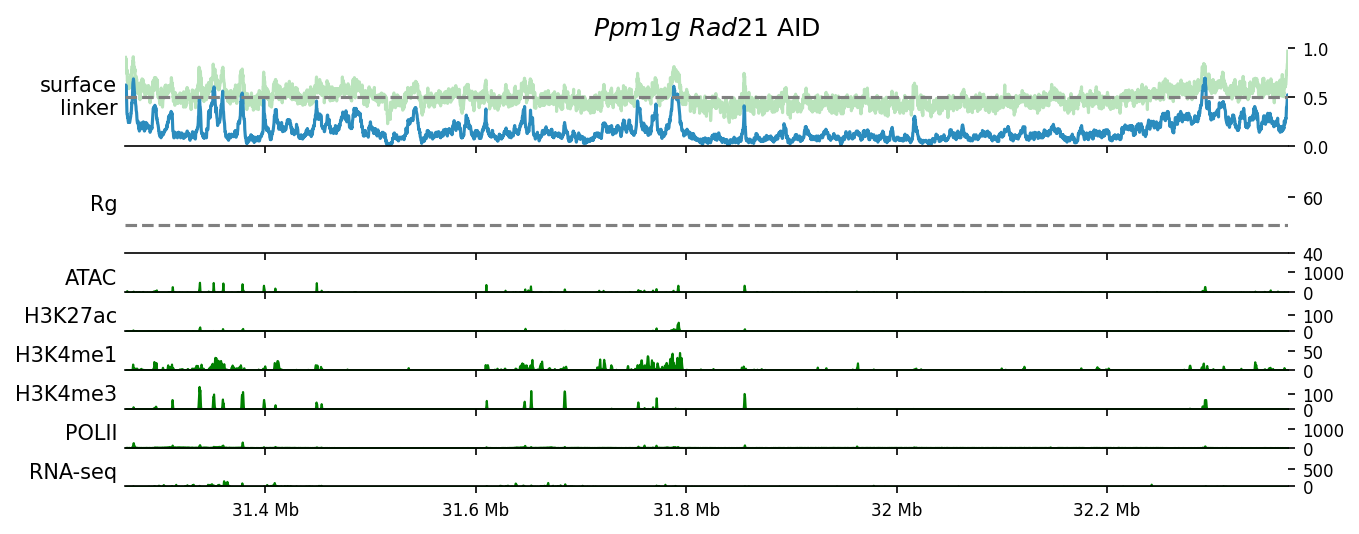

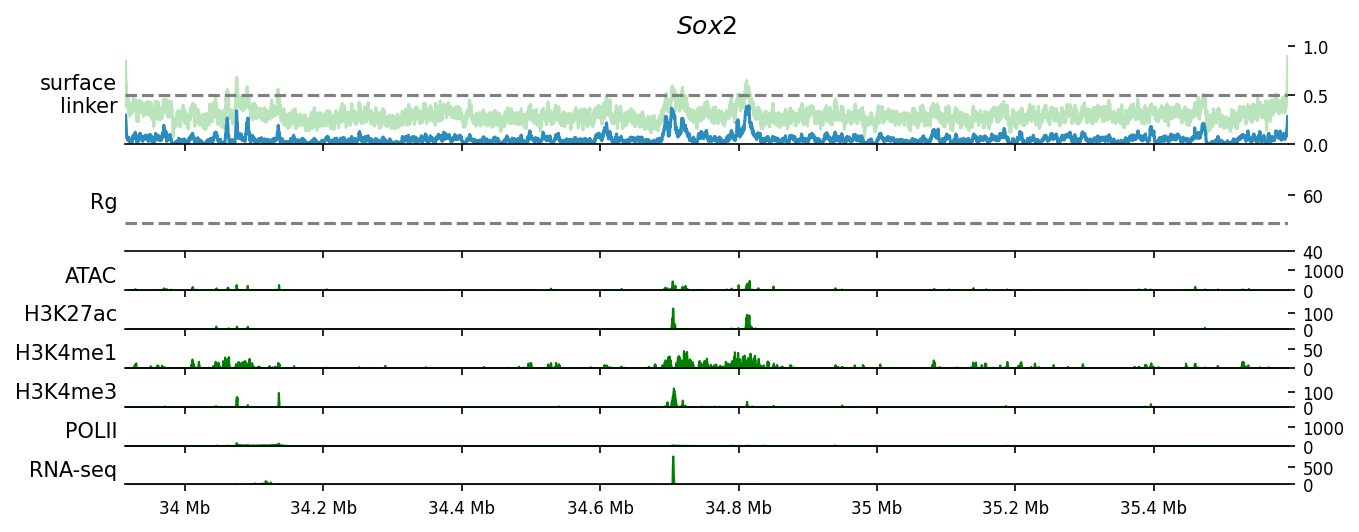

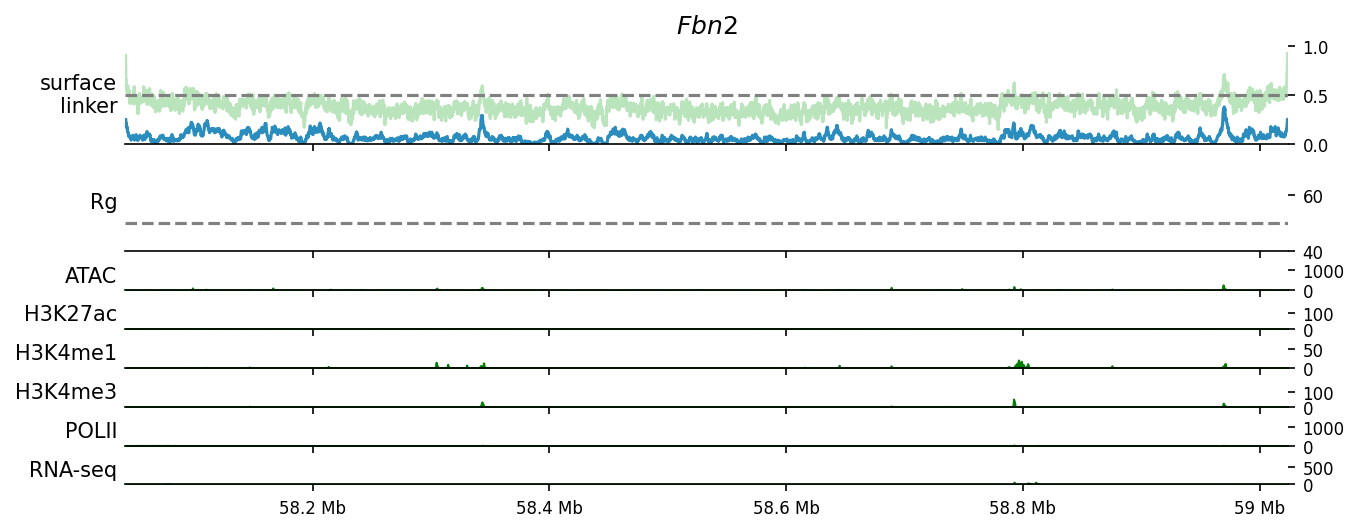

In [11]:
tracks = {
    'ATAC': f'{omics}/genomics_data/GSE98390_E14_ATAC_MERGED.DANPOS.mm39.bw',
    'H3K27ac': f'{omics}/new_genomics_data/ENCFF230RNU.mm39.bw',
    'H3K4me1': f'{omics}/new_genomics_data/ENCFF410CGG.mm39.bw',
    'H3K4me3': f'{omics}/new_genomics_data/ENCFF523UIR.mm39.bw',
    'POLII': f'{omics}/genomics_data/GSM6809981_WT_PolII_xChIP_r2_mm39_MERGED_rmdup_downsampled.bw',
    'RNA-seq': f'{omics}/genomics_data/GSE123636_C59_1_2_RNAseq_coverage.mm39.bw',
    
#     'H3K27me3': f'{supercloud}/new_genomics_data/ENCFF160FEV.mm39.bw',
#     'H3K9me3': f'{supercloud}/new_genomics_data/ENCFF293DGT.mm39.bw',
#     'H1': f'{supercloud}/genomics_data/GSM1124783_H1d-1_IP-IN.mm39.bw',
#     'RCMC-pileup': f'{supercloud}/rcmc/nucleosomes_pe/all.nodups.shift73.bw',

#     'CTCF': f'{supercloud}/genomics_data/GSM2418860_WT_CTCF.mm39.bw',
#     'SMC1A': f'{supercloud}/genomics_data/GSM3508477_C59_Smc1a_SpikeInNormalized.mm39.bw',
#     'MED1': f'{supercloud}/genomics_data/GSM560347_10022009_42TM0AAXX_B6.mm39.bw',
#     'RING1B': f'{supercloud}/genomics_data/GSE96107_ES_Ring1B.mm39.bw',
}

def epigenetics_plot(metrics, tracks, chrom=None, start=None, end=None, smoothing=200,
                     bin=True, ylims=None, width=20, track_height=0.3, metric_height=1):
    height_ratios = [metric_height]*2
    height_ratios += [track_height]*len(tracks)
    f, axs = plt.subplots(len(height_ratios), 1, figsize=(width, sum(height_ratios)), sharex=True,
                          gridspec_kw={'height_ratios': height_ratios})

    def format_ylabel(ax, name):
        # ax.set_ylabel(name, rotation=0, ha='left', labelpad=-10,
        #               bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
        ax.set_ylabel(name, rotation=0, ha='right', va='center')
        ax.yaxis.tick_right()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if ylims is not None:
            ax.set_ylim(*ylims[name])
            
    x = np.arange(start, end, 200)
    colors = ['#bae4bc',  '#2b8cbe'] # https://colorbrewer2.org/#type=sequential&scheme=GnBu&n=4
    names = ['surface', 'linker']
    for i in range(len(colors)):
        name = names[i]
        ax = axs[0]
        ax.plot(x, metrics[name], c=colors[i])
        ax.set_xlim((start, end))
        format_ylabel(ax, name)
    ax.set_ylabel('\n'.join(names), rotation=0, ha='right', va='center')
    
    ax = axs[1]
    name = 'Rg'
    ax.plot(x, metrics[name], c='blue')
    format_ylabel(ax, name)

    for i, (name, track) in enumerate(tracks.items()):
        ax = axs[i+2]
        x, vals = get_epigenetics(track, chrom, start, end, smoothing=smoothing, bin=bin)
        ax.fill_between(x, np.zeros(vals.shape), vals, color='green')
        format_ylabel(ax, name)

        ax.set_ylim(0)
        ax.set_xlim((start, end))
    format_ticks(axs[0], y=False)
    return f, axs


ylims = {}
for track_name, track in tracks.items():
    high = -float('inf')
    for name in prod:
        region = prod[name]['mei'].mei.config['region']
        chrom, start, end = parse_region(region)
        _, vals = get_epigenetics(track, chrom, start, end)
        high = max(high, np.nanmax(vals))
    ylims[track_name] = (0, high)


ylims['linker'] = (0, 1)
ylims['loop'] = (0, 1)
ylims['surface'] = (0, 1)
ylims['Rg'] = (40, 75)
for name in prod:
    region = prod[name]['mei'].mei.config['region']
    chrom, start, end = parse_region(region)

    metrics = {}
    metrics['linker'] = linker[name]
    metrics['surface'] = surface[name]
    metrics['Rg'] = np.ones(metrics['linker'].shape)#get_local_rg(trajectory, window=51)

    f, axs = epigenetics_plot(metrics, tracks, chrom=chrom, start=start, end=end, ylims=ylims, width=10)
    axs[0].set_title(stylized_names[name])
    axs[0].axhline(0.5, c='gray', ls='--')
    axs[1].axhline(50, c='gray', ls='--')
    #plt.savefig(f'img/surface_{name}.pdf')
    plt.show()

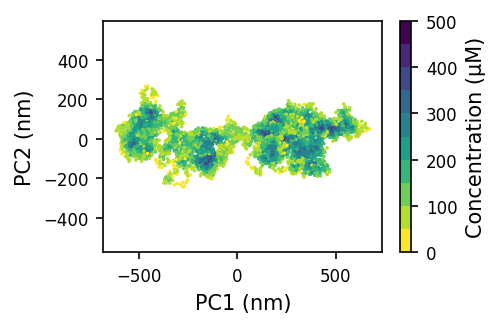

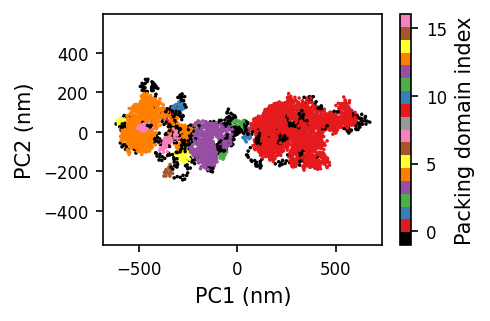

Probe density: 288.43 µM
Hull density: 142.94 µM
Max concentration: 476.96 µM


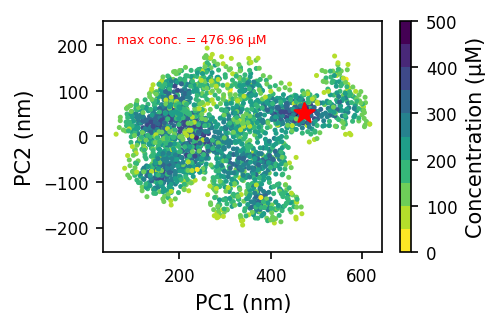

In [12]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from maxentnuc.analysis.domain_analyzer import get_volume

cmap_continuous = plt.get_cmap('viridis_r')
colors = cmap_continuous(np.linspace(0, 1, 10))
cmap_discrete = ListedColormap(colors)

example = domains['klf1'][0]
conc = example.get_concentrations(radius=40)
positions = PCA(n_components=3).fit_transform(example.positions)

f, ax = plt.subplots(figsize=(3, 2))
plt.scatter(positions[:, 0], positions[:, 1],
            c=conc, s=0.5, cmap=cmap_discrete, vmin=0, vmax=500)
plt.colorbar(label='Concentration (µM)')
plt.axis('equal')
plt.xlabel('PC1 (nm)')
plt.ylabel('PC2 (nm)')
plt.savefig('img/density_example_domains.pdf')
plt.show()

f, ax = plt.subplots(figsize=(3, 2))
plt.scatter(positions[:, 0], positions[:, 1],
            c=example.labels, s=0.5, cmap=example.colors())
plt.colorbar(label='Packing domain index')
plt.axis('equal')
plt.xlabel('PC1 (nm)')
plt.ylabel('PC2 (nm)')
plt.savefig('img/density_example.pdf')
plt.show()

mask = example.labels == 0
probe_volume, grid, grid2 = get_volume(positions=positions[mask],
                                       probe_radius=30, particle_radius=5.5, grid_resolution=3.0, return_grid_points=True)
probe_density = to_micromolar(sum(mask), probe_volume)
print(f'Probe density: {probe_density:.2f} µM')

hull_volume = ConvexHull(positions[mask]).volume
hull_density = to_micromolar(sum(mask), hull_volume)
print(f'Hull density: {hull_density:.2f} µM')

f, ax = plt.subplots(figsize=(3, 2))
plt.scatter(positions[mask, 0], positions[mask, 1],
            c=conc[mask], s=2, cmap=cmap_discrete, vmin=0, vmax=500)
plt.colorbar(label='Concentration (µM)')
i = np.argmax(conc[mask])
plt.scatter(positions[mask, 0][i], positions[mask, 1][i],
            c='red', s=100, marker='*')
print(f'Max concentration: {conc[mask][i]:.2f} µM')
plt.axis('equal')
plt.xlabel('PC1 (nm)')
plt.ylabel('PC2 (nm)')
plt.text(0.05, 0.95, f'max conc. = {conc[mask][i]:.2f} µM', transform=plt.gca().transAxes,
         fontsize=6, verticalalignment='top', color='red')

plt.savefig('img/density_example_zoom.pdf')
plt.show()

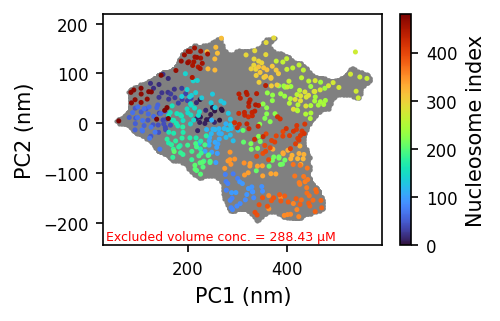

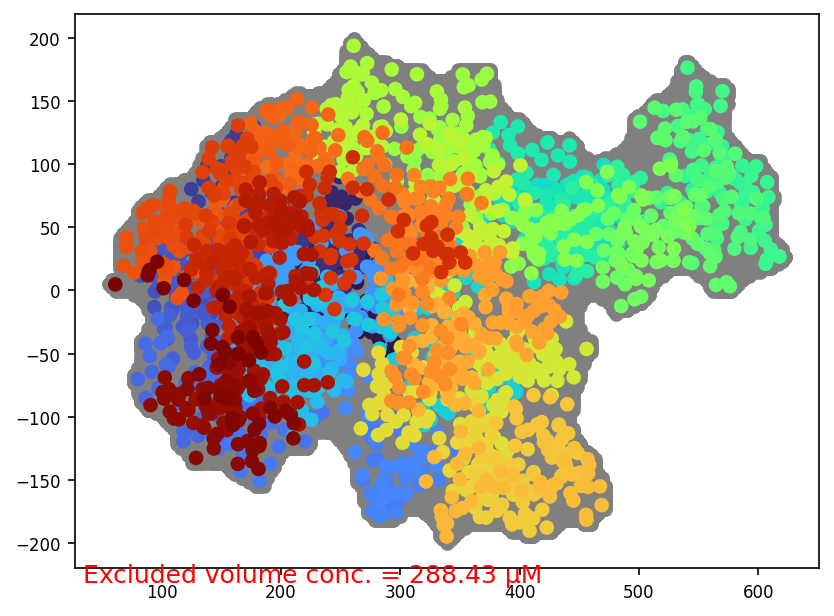

In [13]:
mask2 = np.abs(grid[:, 2]) < 10
f, ax = plt.subplots(figsize=(3, 2))
plt.scatter(grid[mask2, 0], grid[mask2, 1], c='gray', label='Excluded volume', s=1)
mask2 = np.abs(positions[mask, 2]) < 10 + 5.5
plt.scatter(positions[mask, 0][mask2], positions[mask, 1][mask2], c=np.arange(len(positions[mask, 0][mask2])), cmap='turbo',
            label='Nucleosomes', s=2)
plt.colorbar(label='Nucleosome index')
plt.text(0.01, 0.01, f'Excluded volume conc. = {probe_density:.2f} µM', transform=plt.gca().transAxes,
         fontsize=6, verticalalignment='bottom', color='red')

plt.axis('equal')
plt.xlabel('PC1 (nm)')
plt.ylabel('PC2 (nm)')
plt.savefig('img/density_example_excluded_volume.pdf')
plt.show()

plt.scatter(grid[:, 0], grid[:, 1], c='gray')
plt.scatter(positions[mask, 0], positions[mask, 1], c=np.arange(len(positions[mask, 0])), cmap='turbo')
plt.text(0.01, 0.01, f'Excluded volume conc. = {probe_density:.2f} µM', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', color='red')
plt.show()

In [14]:
from tqdm import tqdm
from maxentnuc.analysis.domain_analyzer import get_volume, to_micromolar

sizes = {}
for name in main_names:
    sizes[name] = []
    for domain in domains[name]:
        for cluster in range(domain.n_clusters):
            points = domain.positions[domain.labels == cluster]
            sizes[name] += [200*len(points)]
    sizes[name] = np.array(sizes[name])

rgs = {}
for name in main_names:
    rgs[name] = []
    for domain in domains[name]:
        for cluster in range(domain.n_clusters):
            points = domain.positions[domain.labels == cluster]
            rgs[name] += [np.sqrt(np.sum((points - points.mean(axis=0, keepdims=True))**2) / len(points))]
    rgs[name] = np.array(rgs[name])

maxconc = {}
for name in main_names:
    maxconc[name] = []
    for domain in tqdm(domains[name]):
        conc = domain.get_concentrations(radius=40)
        for cluster in range(domain.n_clusters):
            maxconc[name] += [np.max(conc[domain.labels == cluster])]
    maxconc[name] = np.array(maxconc[name])

avgconc = {}
for name in main_names:
    avgconc[name] = []
    for domain in tqdm(domains[name]):
        conc = domain.get_concentrations(radius=40)
        for cluster in range(domain.n_clusters):
            avgconc[name] += [np.mean(conc[domain.labels == cluster])]
    avgconc[name] = np.array(avgconc[name])

probe = {}
for name in main_names:
    probe[name] = []
    for domain in tqdm(domains[name]):
        for cluster in range(domain.n_clusters):
            points = domain.positions[domain.labels == cluster]
            volume = get_volume(points, probe_radius=30, particle_radius=5.5, grid_resolution=5)
            probe[name] += [to_micromolar(len(points), volume)]
    probe[name] = np.array(probe[name])

probe_pad = {}
for name in main_names:
    probe_pad[name] = []
    for domain in tqdm(domains[name]):
        for cluster in range(domain.n_clusters):
            points = domain.positions[domain.labels == cluster]
            volume = get_volume(points, probe_radius=30, particle_radius=11.0, grid_resolution=5)
            probe_pad[name] += [to_micromolar(len(points), volume)]
    probe_pad[name] = np.array(probe_pad[name])

probe_20_pad = {}
for name in main_names:
    probe_20_pad[name] = []
    for domain in tqdm(domains[name]):
        for cluster in range(domain.n_clusters):
            points = domain.positions[domain.labels == cluster]
            volume = get_volume(points, probe_radius=20, particle_radius=11.0, grid_resolution=5)
            probe_20_pad[name] += [to_micromolar(len(points), volume)]
    probe_20_pad[name] = np.array(probe_20_pad[name])

100%|██████████| 160/160 [02:33<00:00,  1.04it/s]


nanog Rg: 123.97 ± 22.74
sox2 Rg: 219.96 ± 32.14
fbn2 Rg: 172.05 ± 42.30
klf1 Rg: 151.44 ± 40.59
ppm1g Rg: 179.42 ± 33.89


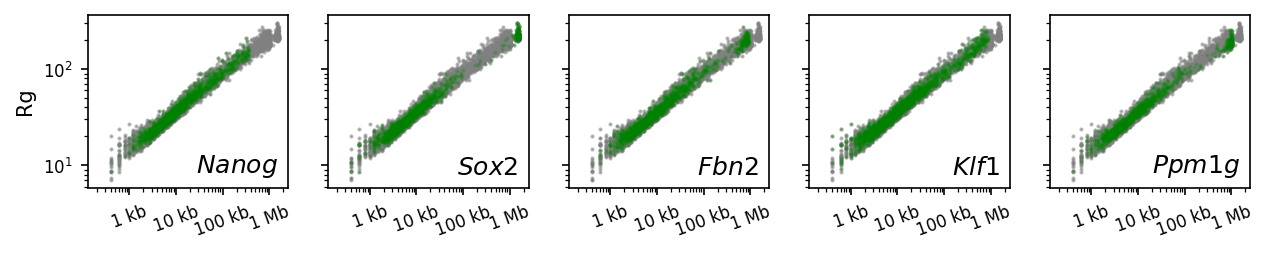

nanog Max. conc.: 388.63 ± 40.43
sox2 Max. conc.: 468.45 ± 25.23
fbn2 Max. conc.: 433.95 ± 37.27
klf1 Max. conc.: 409.10 ± 37.23
ppm1g Max. conc.: 462.38 ± 33.64


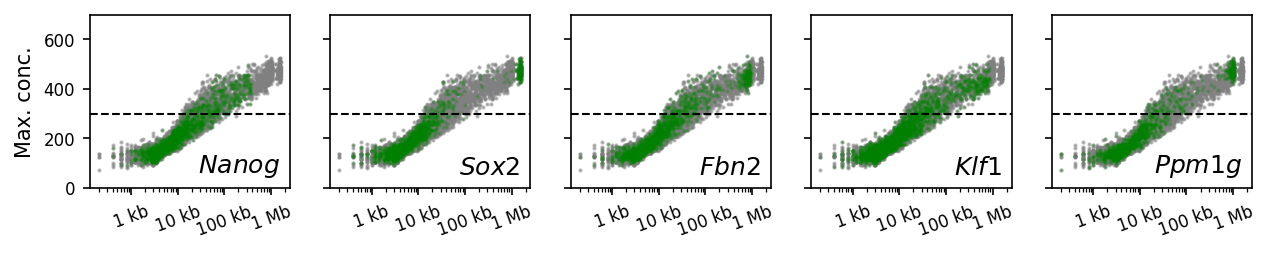

nanog Avg. conc.: 195.06 ± 12.77
sox2 Avg. conc.: 230.82 ± 9.73
fbn2 Avg. conc.: 212.83 ± 13.70
klf1 Avg. conc.: 201.41 ± 11.64
ppm1g Avg. conc.: 230.87 ± 14.52


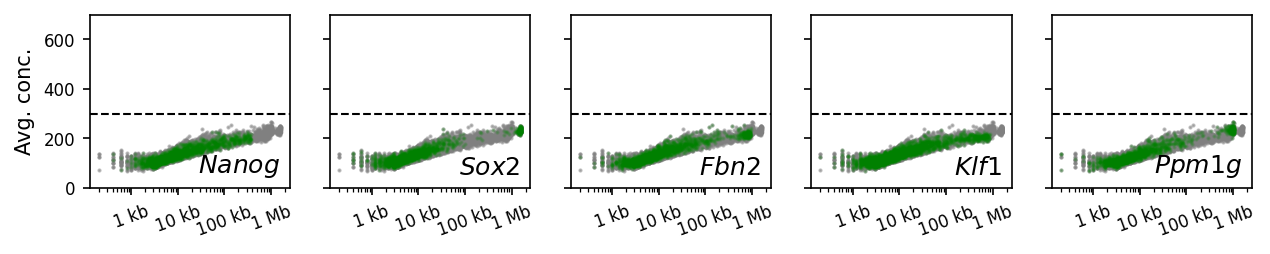

nanog Excluded volume: 296.62 ± 13.19
sox2 Excluded volume: 277.57 ± 9.74
fbn2 Excluded volume: 293.66 ± 19.48
klf1 Excluded volume: 285.30 ± 14.76
ppm1g Excluded volume: 291.18 ± 11.32


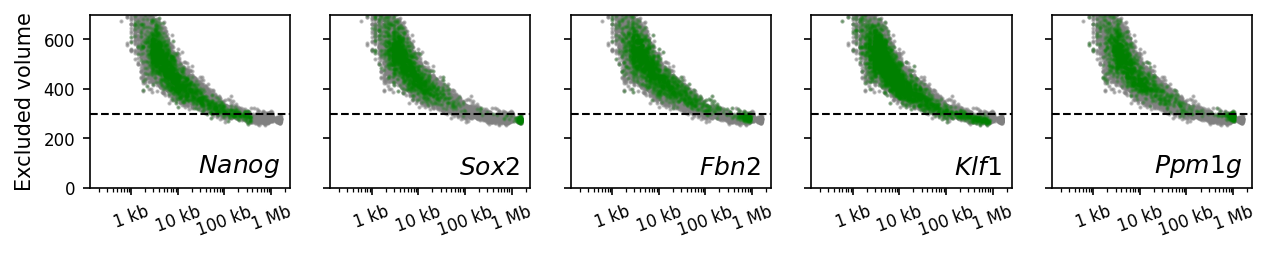

nanog Excluded volume (padded): 219.14 ± 9.50
sox2 Excluded volume (padded): 225.76 ± 6.95
fbn2 Excluded volume (padded): 224.50 ± 11.99
klf1 Excluded volume (padded): 216.13 ± 9.10
ppm1g Excluded volume (padded): 231.99 ± 9.20


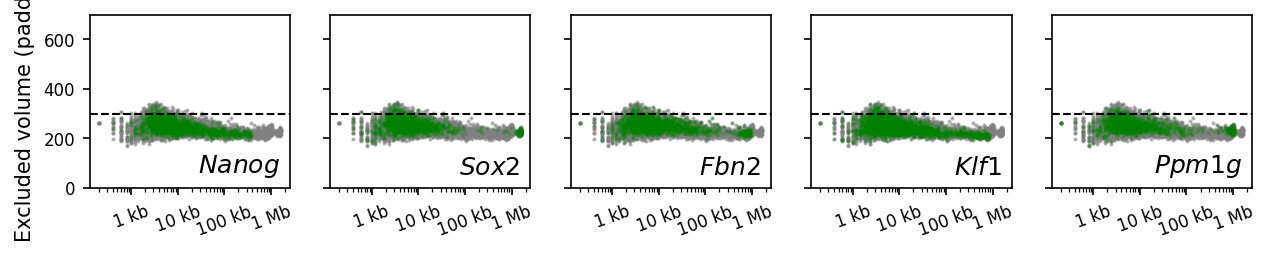

nanog Excluded volume (20): 233.79 ± 8.44
sox2 Excluded volume (20): 241.78 ± 5.57
fbn2 Excluded volume (20): 241.18 ± 10.02
klf1 Excluded volume (20): 231.55 ± 7.69
ppm1g Excluded volume (20): 247.77 ± 7.82


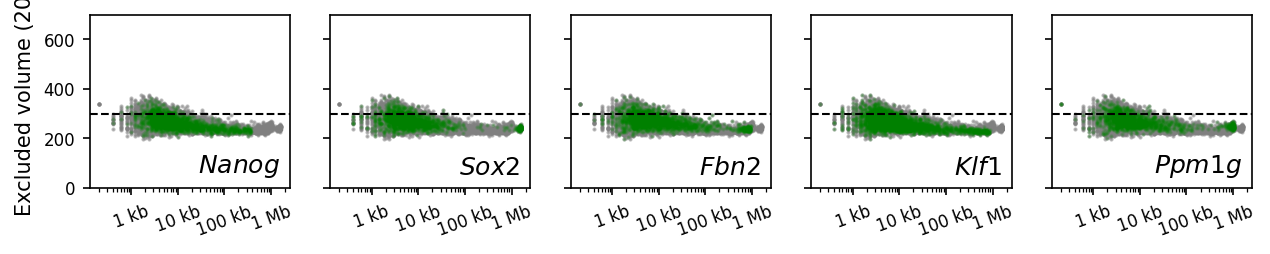

In [15]:
for method, values in zip(['Rg', 'Max. conc.', 'Avg. conc.', 'Excluded volume', 'Excluded volume (padded)', 'Excluded volume (20)'],
                          [rgs, maxconc, avgconc, probe, probe_pad, probe_20_pad]):
    f, axs = plt.subplots(1, len(main_names), figsize=(10, 1.5), sharey=True, sharex=True,)
    for name, ax in zip(main_names, axs):
        for name2 in main_names:
            ax.scatter(sizes[name2], values[name2], s=1, alpha=0.5, c='gray', rasterized=True)

        ax.scatter(sizes[name], values[name], s=1, label=stylized_names[name], alpha=0.2, c='green', rasterized=True)
        if method == 'Rg':
            ax.set_yscale('log')
        else:
            ax.set_ylim(0, 700)
            ax.axhline(300, color='k', ls='--', lw=1)
        ax.set_xscale('log')
        format_ticks(ax, y=False)
        ax.text(0.95, 0.05, stylized_names[name], transform=ax.transAxes,
                fontsize=12, verticalalignment='bottom', horizontalalignment='right')
        mask = sizes[name] > 100_000
        print(f'{name} {method}: {np.mean(values[name][mask]):.2f} ± {np.std(values[name][mask]):.2f}')
    axs[0].set_ylabel(method)
    plt.savefig(f'img/density_{method}.pdf', bbox_inches='tight')
    plt.show()

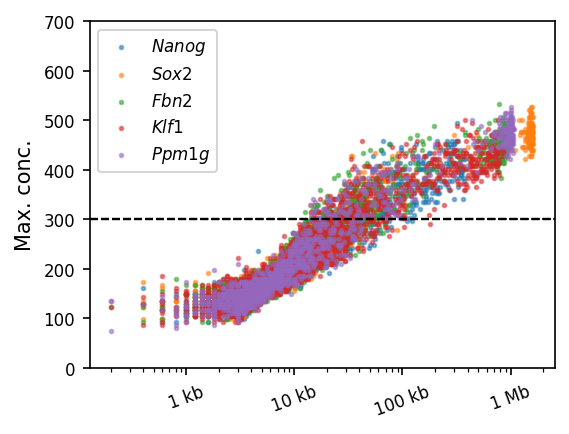

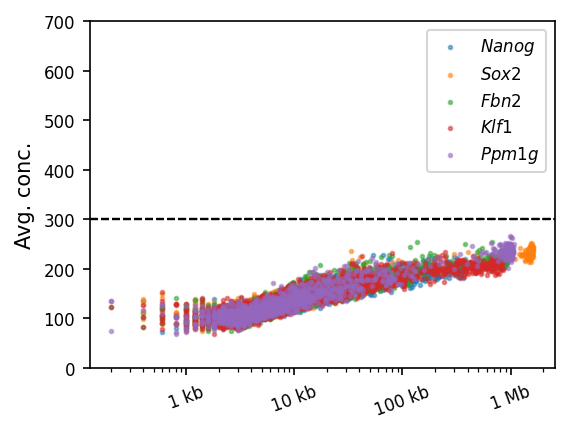

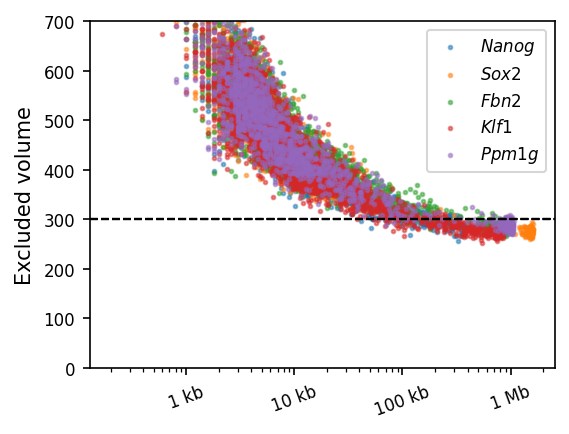

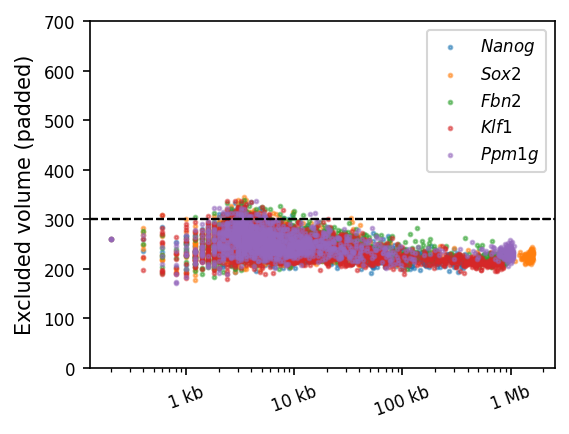

In [16]:
for method, values in zip(['Max. conc.', 'Avg. conc.', 'Excluded volume', 'Excluded volume (padded)'], [maxconc, avgconc, probe, probe_pad]):
    f, ax = plt.subplots(figsize=(4, 3))
    for name in main_names:
        ax.scatter(sizes[name], values[name], s=3, label=stylized_names[name], alpha=0.5, rasterized=True)
        ax.set_ylim(0, 700)
        ax.axhline(300, color='k', ls='--', lw=1)
        ax.set_xscale('log') 
    ax.set_ylabel(method)
    ax.legend()
    format_ticks(ax, y=False)

    plt.savefig(f'img/density_{method}_merged.pdf', bbox_inches='tight')
    plt.show()

Large fit: [2.16516209 0.32892955]
Small fit: [0.77990975 0.41746048]


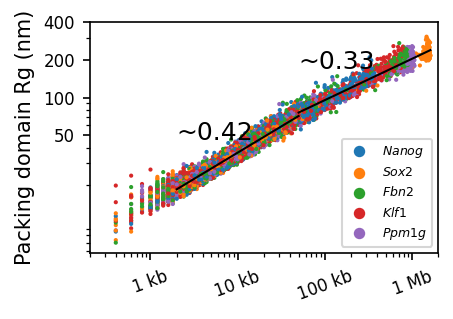

In [20]:
values = rgs

f, ax = plt.subplots(figsize=(3, 2))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

all_diameters = np.concatenate([values[name] for name in main_names])
all_counts = np.concatenate([sizes[name] for name in main_names])
all_colors = np.concatenate([[color]*len(values[name]) for name, color in zip(main_names, colors)])

np.random.seed(0)
order = np.random.permutation(len(all_diameters))
ax.scatter(all_counts[order], all_diameters[order], c=all_colors[order], s=1, alpha=1, rasterized=True)
ax.set_yscale('log')
ax.set_xscale('log') 
ax.set_ylabel('Packing domain Rg (nm)')
for name, color in zip(main_names, colors):
    ax.scatter([], [], color=color, label=stylized_names[name], s=20)
ax.legend(loc='lower right', fontsize=6)
ax.set_xlim(200, 2_000_000)
format_ticks(ax, y=False)

breakpoint = 50_000
all_diameters = np.concatenate([values[name] for name in main_names])
all_counts = np.concatenate([sizes[name] for name in main_names])
mask = ~np.isnan(all_diameters) & (all_counts > breakpoint)
popt, _ = curve_fit(power_law, all_counts[mask], all_diameters[mask])
x = np.linspace(breakpoint, np.max(all_counts))
print('Large fit:', popt)
ax.plot(x, power_law(x, *popt),  color='black', lw=1)
ax.text(x[0], power_law(x[len(x)//4], *popt), f'~{popt[1]:.2f}',
                color='black', fontsize=12, ha='left', va='bottom')

mask = ~np.isnan(all_diameters) & (all_counts < breakpoint)
popt, _ = curve_fit(power_law, all_counts[mask], all_diameters[mask])
x = np.linspace(2_000, breakpoint)
print('Small fit:', popt)
ax.plot(x, power_law(x, *popt), color='black', lw=1)
ax.text(x[0], power_law(x[len(x)//4], *popt), f'~{popt[1]:.2f}',
color='black', fontsize=12, ha='left', va='bottom')
ax.set_yticks([50, 100, 200, 400])
ax.set_yticklabels([50, 100, 200, 400])
plt.savefig(f'img/density_Rg_merged.pdf')
plt.show()

(2410, 3)
161.88472


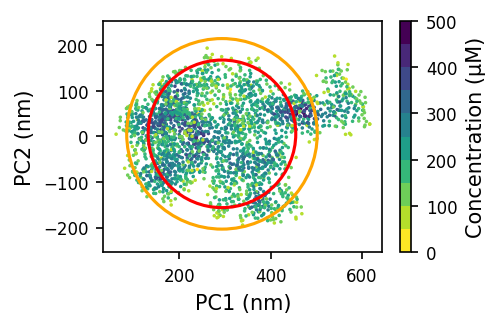

In [18]:
example = domains['klf1'][0]
conc = example.get_concentrations(radius=40)
positions = PCA(n_components=3).fit_transform(example.positions)
mask = example.labels == 0

points = positions[mask]
print(points.shape)
rg = np.sqrt(np.sum((points - points.mean(axis=0, keepdims=True))**2) / len(points))
print(rg)

f, ax = plt.subplots(figsize=(3, 2))
plt.scatter(positions[mask, 0], positions[mask, 1],
            c=conc[mask], s=0.5, cmap=cmap_discrete, vmin=0, vmax=500)

center = points.mean(axis=0)
circle = plt.Circle(center, radius=rg, color='red', fill=False, lw=1.5, label='Rg')
plt.gca().add_artist(circle)

center = points.mean(axis=0)
circle = plt.Circle(center, radius=rg * np.sqrt(5/3), color='orange', fill=False, lw=1.5, label='Rg')
plt.gca().add_artist(circle)

plt.colorbar(label='Concentration (µM)')
plt.axis('equal')
plt.xlabel('PC1 (nm)')
plt.ylabel('PC2 (nm)')
plt.show()

nanog nan nan
sox2 177.72882 799800.0
fbn2 199.08138 829300.0
klf1 200.33478 754300.0
ppm1g 185.2848 931200.0


/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/joepaggi/miniconda3/envs/neighbor/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:901: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


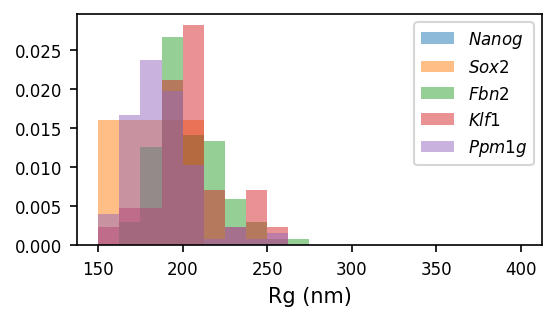

nanog 116.10147 171600.0
sox2 113.46487 215200.0
fbn2 106.38067 136900.0
klf1 111.985405 186500.0
ppm1g 100.977264 129400.0


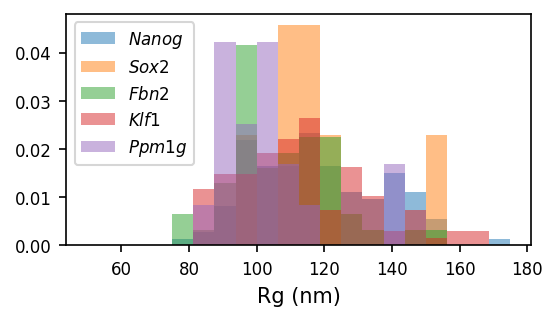

In [25]:
values = rgs
for low, high, bins  in [(700_000, 1_000_000, np.linspace(150, 400, 21)), (100_000, 300_000, np.linspace(50, 175, 21))]:
    f, ax = plt.subplots(figsize=(4, 2))
    for name in main_names:
        mask = (sizes[name] > low) & (sizes[name] < high)
        print(name, np.median(values[name][mask]), np.median(sizes[name][mask]))
        ax.hist(values[name][mask], bins=bins, alpha=0.5, label=stylized_names[name], density=True)
    plt.legend()
    plt.xlabel('Rg (nm)')
    plt.show()